In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)
from scipy.misc import imread
import matplotlib.patches as patches
from torch.utils.data import DataLoader
from torch.optim import SGD
import cv2

In [3]:
import os
import torchvision.transforms as transforms
from faster_rcnn.utils.dataset import CocoData
dataDir = './data/mscoco'
dataType = 'train2014'
annFile='%s/annotations/instances_%s.json'%(dataDir,dataType)

images_dir = os.path.join(dataDir,'images', dataType)
cap = CocoData(root = images_dir,
                        annFile = annFile,
                        transform=transforms.ToTensor())


loading annotations into memory...
Done (t=12.56s)
creating index...
index created!


[{u'segmentation': [[338.36, 265.79, 341.63, 252.67, 342.29, 240.87, 340.98, 237.6, 326.56, 238.25, 320.66, 214.65, 322.62, 194.33, 332.46, 184.5, 339.67, 176.63, 344.26, 172.04, 350.81, 170.73, 354.09, 168.11, 354.09, 162.87, 354.09, 162.21, 346.88, 161.55, 339.67, 174.01, 335.08, 171.39, 335.08, 163.52, 344.91, 155.0, 350.81, 151.07, 360.64, 151.72, 369.82, 154.34, 380.31, 155.0, 389.49, 157.62, 396.7, 165.49, 396.7, 173.35, 390.8, 174.01, 388.18, 168.77, 382.93, 165.49, 376.38, 163.52, 375.72, 170.73, 373.75, 172.04, 382.28, 169.42, 388.18, 174.66, 390.8, 180.56, 396.04, 194.99, 398.67, 213.34, 398.67, 235.63, 396.04, 243.5, 392.77, 244.15, 384.9, 239.56, 381.62, 248.74, 381.62, 259.23, 382.93, 271.69, 385.55, 276.93, 375.72, 277.59, 376.38, 264.47, 373.75, 263.16, 371.79, 250.05, 373.75, 241.53, 377.69, 231.7, 353.43, 231.04, 349.5, 263.16, 345.57, 271.03, 339.01, 267.1]], u'area': 5996.242450000001, u'iscrowd': 0, u'image_id': 131093, u'bbox': [320.66, 151.07, 78.01, 126.52], u'ca

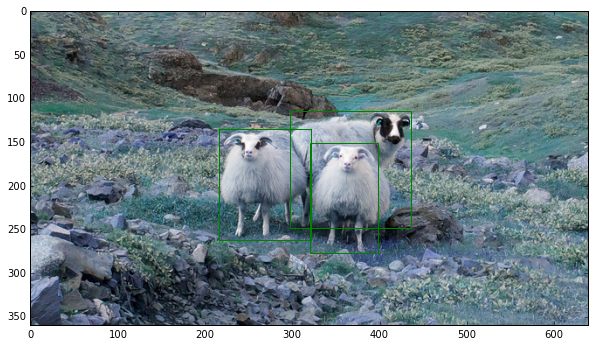

In [7]:
im_id = cap.ids[14]
cap.coco.getAnnIds(im_id)
img_info =  cap.coco.loadImgs(im_id)[0]
img_name = img_info['file_name']
annIds = cap.coco.getAnnIds(imgIds=im_id, iscrowd=None)
anns = cap.coco.loadAnns(annIds)
print anns
fig,ax = plt.subplots(1)
base_path = './data/mscoco/images/train2014/'
img_path = os.path.join(base_path, img_name)
# Display the image
im_data = cv2.imread(img_path)

ax.imshow(im_data)
# Create a Rectangle patch
for i, box_anns in enumerate(anns):
    box = box_anns['bbox']
    print box
    rect = patches.Rectangle((box[0], box[1]), box[2], box[3] ,linewidth=1,edgecolor='g',facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    
# Add the patch to the Axes
ax.add_patch(rect)    
    
plt.show()